In [1]:
# Overall approach:
# 1. Data cleaning
# 2. EDA 
# 3. Encoding
# 4. Scaling numeric
# 5. Feature Engineering & Feature Selection
# 6. Model training 
# 7. Model comparison
# 8. Final model implementation 
# 9. Deployment: Heroku & Docker 

In [2]:
# Dataset: IBM’s Telco Customer Churn dataset (Kaggle)

In [3]:
# Load Dataset

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('Telecom_Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.shape

(7043, 21)

In [7]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
df.drop('customerID', axis='columns', inplace=True)

In [9]:
# Add New Features

In [10]:
# TotalServicesSubscribed
service_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
df['TotalServicesSubscribed'] = (df[service_cols] == 'Yes').sum(axis=1)

In [11]:
# HasInternetService
df['HasInternetService'] = (df['InternetService'] != 'No').astype(int)

In [12]:
# HouseholdSupportScore
df['HouseholdSupportScore'] = (
    (df['Partner'] == 'Yes').astype(int) +
    (df['Dependents'] == 'Yes').astype(int))

In [13]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'TotalServicesSubscribed',
       'HasInternetService', 'HouseholdSupportScore'],
      dtype='object')

In [14]:
df.shape

(7043, 23)

In [15]:
# Handling Null Values

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gender                   7043 non-null   object 
 1   SeniorCitizen            7043 non-null   int64  
 2   Partner                  7043 non-null   object 
 3   Dependents               7043 non-null   object 
 4   tenure                   7043 non-null   int64  
 5   PhoneService             7043 non-null   object 
 6   MultipleLines            7043 non-null   object 
 7   InternetService          7043 non-null   object 
 8   OnlineSecurity           7043 non-null   object 
 9   OnlineBackup             7043 non-null   object 
 10  DeviceProtection         7043 non-null   object 
 11  TechSupport              7043 non-null   object 
 12  StreamingTV              7043 non-null   object 
 13  StreamingMovies          7043 non-null   object 
 14  Contract                

In [17]:
df.dtypes

gender                      object
SeniorCitizen                int64
Partner                     object
Dependents                  object
tenure                       int64
PhoneService                object
MultipleLines               object
InternetService             object
OnlineSecurity              object
OnlineBackup                object
DeviceProtection            object
TechSupport                 object
StreamingTV                 object
StreamingMovies             object
Contract                    object
PaperlessBilling            object
PaymentMethod               object
MonthlyCharges             float64
TotalCharges                object
Churn                       object
TotalServicesSubscribed      int64
HasInternetService           int32
HouseholdSupportScore        int32
dtype: object

In [18]:
# Convert 'TotalCharges' to numeric
# ERROR: pd.to_numeric(df.TotalChargdfes)
df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TotalServicesSubscribed,HasInternetService,HouseholdSupportScore
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,...,No,Two year,Yes,Bank transfer (automatic),52.55,,No,4,1,2
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,...,No internet service,Two year,No,Mailed check,20.25,,No,0,0,1
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,...,Yes,Two year,No,Mailed check,80.85,,No,5,1,2
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,...,No internet service,Two year,No,Mailed check,25.75,,No,0,0,2
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,...,No,Two year,No,Credit card (automatic),56.05,,No,5,1,2
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,...,No internet service,Two year,No,Mailed check,19.85,,No,0,0,2
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,...,No internet service,Two year,No,Mailed check,25.35,,No,0,0,2
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,...,No internet service,Two year,No,Mailed check,20.00,,No,0,0,2
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,...,No internet service,One year,Yes,Mailed check,19.70,,No,0,0,2
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,...,No,Two year,No,Mailed check,73.35,,No,4,1,2


In [19]:
df[df.TotalCharges != ' '].shape

(7032, 23)

In [20]:
df = df[df.TotalCharges != ' ']
df.shape

(7032, 23)

In [21]:
df.TotalCharges = pd.to_numeric(df.TotalCharges)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gender                   7032 non-null   object 
 1   SeniorCitizen            7032 non-null   int64  
 2   Partner                  7032 non-null   object 
 3   Dependents               7032 non-null   object 
 4   tenure                   7032 non-null   int64  
 5   PhoneService             7032 non-null   object 
 6   MultipleLines            7032 non-null   object 
 7   InternetService          7032 non-null   object 
 8   OnlineSecurity           7032 non-null   object 
 9   OnlineBackup             7032 non-null   object 
 10  DeviceProtection         7032 non-null   object 
 11  TechSupport              7032 non-null   object 
 12  StreamingTV              7032 non-null   object 
 13  StreamingMovies          7032 non-null   object 
 14  Contract                 7032

In [23]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,TotalServicesSubscribed,HasInternetService,HouseholdSupportScore
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441,2.038111,0.783845,0.781001
std,0.368844,24.545260,30.085974,2266.771362,1.847161,0.411650,0.816097
min,0.000000,1.000000,18.250000,18.800000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,35.587500,401.450000,0.000000,1.000000,0.000000
50%,0.000000,29.000000,70.350000,1397.475000,2.000000,1.000000,1.000000
75%,0.000000,55.000000,89.862500,3794.737500,3.000000,1.000000,1.000000
max,1.000000,72.000000,118.750000,8684.800000,6.000000,1.000000,2.000000


In [24]:
# Outlier Detection 
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    has_outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).any()
    
    print(f"\nColumn: {col}")
    print(f"  Lower Bound: {lower_bound}")
    print(f"  Upper Bound: {upper_bound}")
    print(f"  Any outliers? : {has_outliers}")


Column: tenure
  Lower Bound: -60.0
  Upper Bound: 124.0
  Any outliers? : False

Column: MonthlyCharges
  Lower Bound: -45.824999999999996
  Upper Bound: 171.27499999999998
  Any outliers? : False

Column: TotalCharges
  Lower Bound: -4688.481250000001
  Upper Bound: 8884.66875
  Any outliers? : False


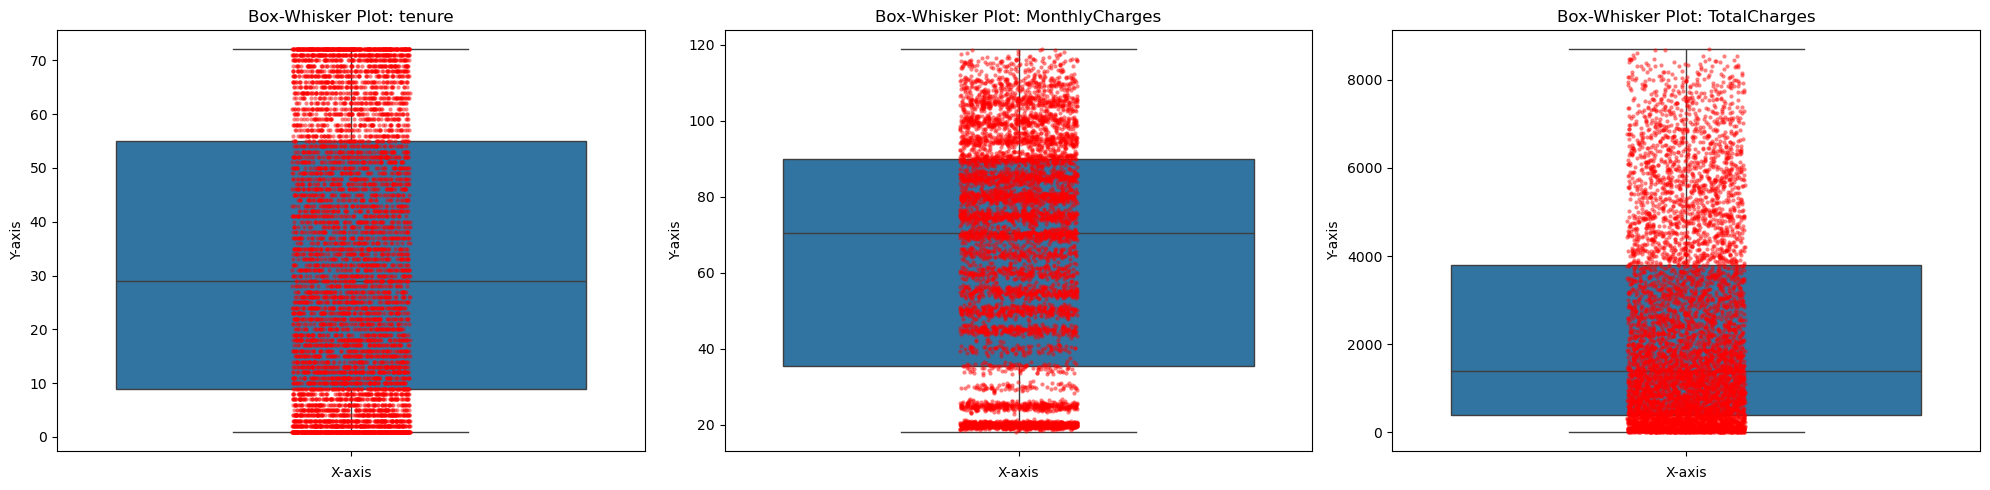

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

plt.figure(figsize=(20, 5))

for i, col in enumerate(num_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df[col])
    sns.stripplot(y=df[col], color='red', size=3, jitter=True, alpha=0.5)
    plt.title(f'Box-Whisker Plot: {col}')
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")

plt.tight_layout()
plt.show()

In [26]:
# EDA 

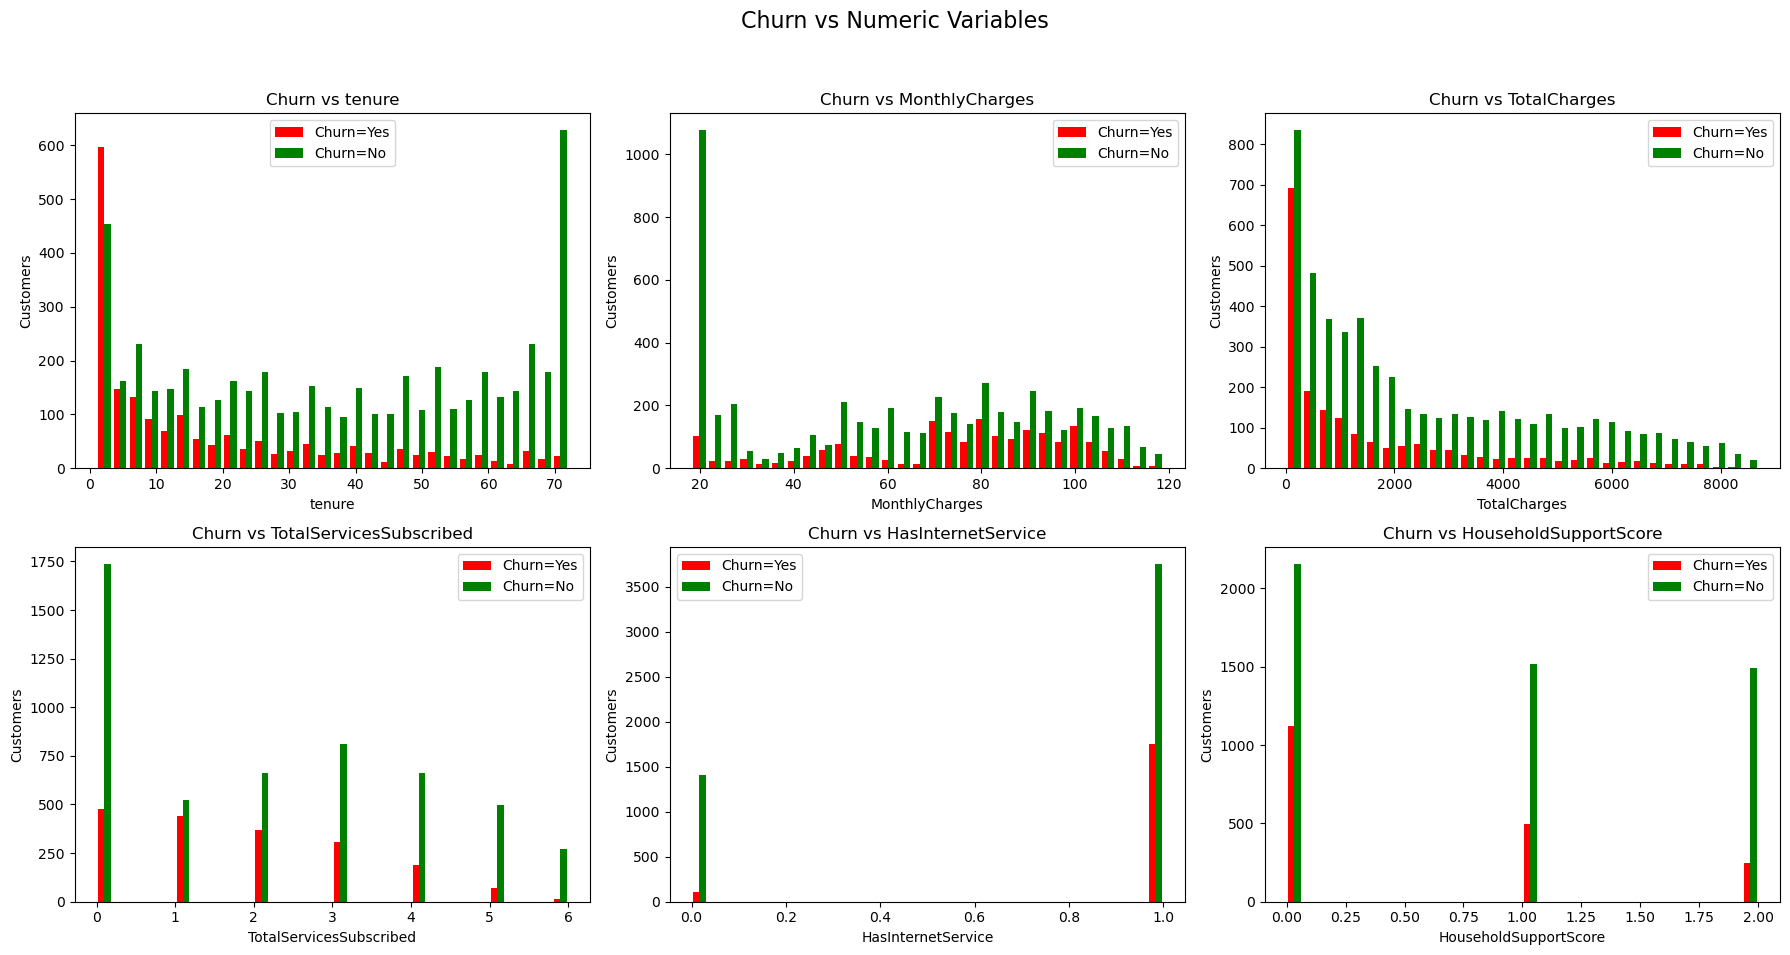

In [27]:
df_yes = df[df['Churn'] == 'Yes']
df_no = df[df['Churn'] == 'No']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Churn vs Numeric Variables', fontsize=16)

variables = ['tenure', 'MonthlyCharges', 'TotalCharges', 'TotalServicesSubscribed', 'HasInternetService', 'HouseholdSupportScore']
titles = ['tenure', 'MonthlyCharges', 'TotalCharges', 'TotalServicesSubscribed', 'HasInternetService', 'HouseholdSupportScore']

for ax, var, title in zip(axes.flatten(), variables, titles):
    ax.hist([df_yes[var], df_no[var]], color=['red', 'green'], label=['Churn=Yes', 'Churn=No'], bins=30)
    ax.set_title(f'Churn vs {title}')
    ax.set_xlabel(title)
    ax.set_ylabel('Customers')
    ax.legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [28]:
df.select_dtypes(include='object').columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

C:\Users\Atul Gupta\AppData\Local\Temp\ipykernel_9388\2585301248.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_rate.index, y=churn_rate.values, palette='Set2')
C:\Users\Atul Gupta\AppData\Local\Temp\ipykernel_9388\2585301248.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_rate.index, y=churn_rate.values, palette='Set2')
C:\Users\Atul Gupta\AppData\Local\Temp\ipykernel_9388\2585301248.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_rate.index, y=churn_rate.values, palette='Set2')


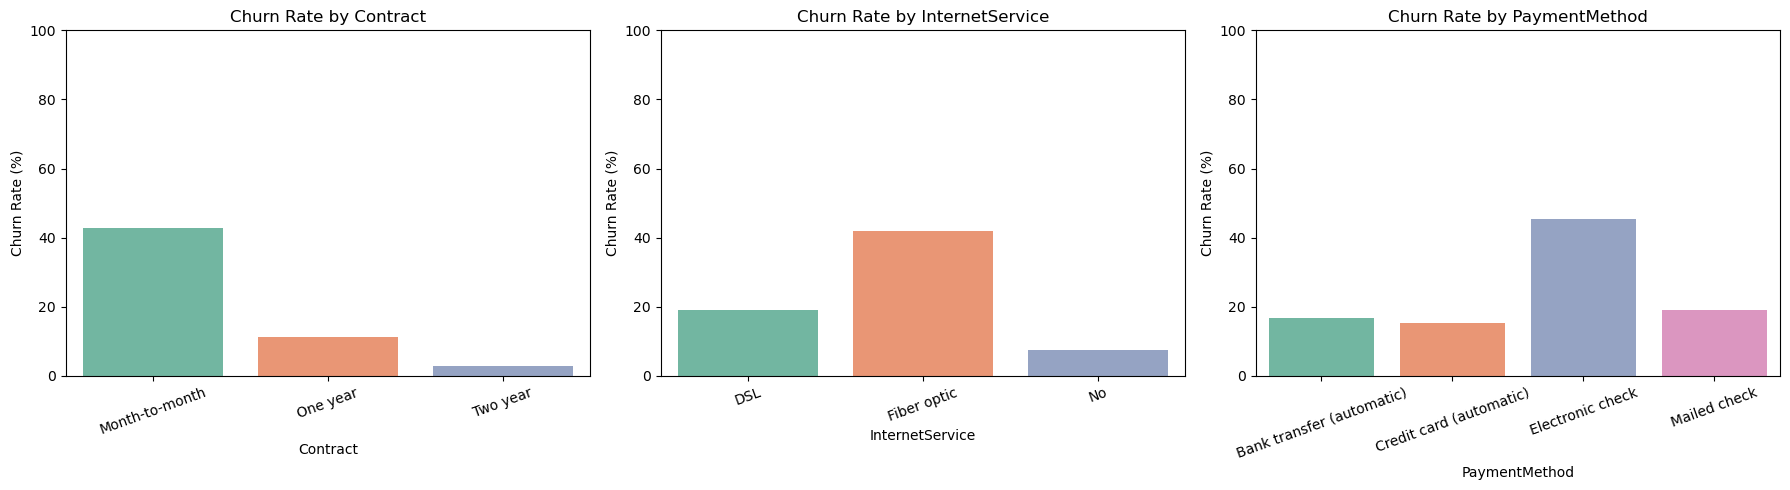

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
cols = ['Contract', 'InternetService', 'PaymentMethod']
plt.figure(figsize=(18, 5)) 

for i, col in enumerate(cols, 1):
    churn_rate = df.groupby(col)['Churn'].value_counts(normalize=True).unstack().fillna(0)['Yes'] * 100
    plt.subplot(1, 3, i)
    sns.barplot(x=churn_rate.index, y=churn_rate.values, palette='Set2')
    plt.title(f'Churn Rate by {col}')
    plt.ylabel('Churn Rate (%)')
    plt.xlabel(col)
    plt.xticks(rotation=20)
    plt.ylim(0, 100)

plt.tight_layout()
plt.show()

In [30]:
# Handle Data-type 'object'

In [31]:
df.dtypes

gender                      object
SeniorCitizen                int64
Partner                     object
Dependents                  object
tenure                       int64
PhoneService                object
MultipleLines               object
InternetService             object
OnlineSecurity              object
OnlineBackup                object
DeviceProtection            object
TechSupport                 object
StreamingTV                 object
StreamingMovies             object
Contract                    object
PaperlessBilling            object
PaymentMethod               object
MonthlyCharges             float64
TotalCharges               float64
Churn                       object
TotalServicesSubscribed      int64
HasInternetService           int32
HouseholdSupportScore        int32
dtype: object

In [32]:
# Encoding

In [33]:
df.nunique()

gender                        2
SeniorCitizen                 2
Partner                       2
Dependents                    2
tenure                       72
PhoneService                  2
MultipleLines                 3
InternetService               3
OnlineSecurity                3
OnlineBackup                  3
DeviceProtection              3
TechSupport                   3
StreamingTV                   3
StreamingMovies               3
Contract                      3
PaperlessBilling              2
PaymentMethod                 4
MonthlyCharges             1584
TotalCharges               6530
Churn                         2
TotalServicesSubscribed       7
HasInternetService            2
HouseholdSupportScore         3
dtype: int64

In [34]:
df.Churn.unique()

array(['No', 'Yes'], dtype=object)

In [35]:
def unique_values(df):
    for col in df:
        if df[col].dtypes == 'object':
            print(f"{col}: {df[col].unique()}")
unique_values(df)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [36]:
df.replace('No internet service', 'No', inplace=True)
df.replace('No phone service', 'No', inplace=True)

In [37]:
unique_values(df)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [38]:
# Convert Yes/No to 1/0
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df[col].replace({'Yes':1,'No':0},inplace=True)

C:\Users\Atul Gupta\AppData\Local\Temp\ipykernel_9388\1463380246.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace({'Yes':1,'No':0},inplace=True)
C:\Users\Atul Gupta\AppData\Local\Temp\ipykernel_9388\1463380246.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col].replace({'Y

In [39]:
# Convert Male/Female to 0/1
df['gender'].replace({'Female':1,'Male':0}, inplace=True)

C:\Users\Atul Gupta\AppData\Local\Temp\ipykernel_9388\2883754567.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['gender'].replace({'Female':1,'Male':0}, inplace=True)
C:\Users\Atul Gupta\AppData\Local\Temp\ipykernel_9388\2883754567.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gend

In [40]:
unique_values(df)

InternetService: ['DSL' 'Fiber optic' 'No']
Contract: ['Month-to-month' 'One year' 'Two year']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [41]:
# Encoding Technique 
df = pd.get_dummies(data=df, columns=['InternetService', 'Contract', 'PaymentMethod'])
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'TotalServicesSubscribed', 'HasInternetService',
       'HouseholdSupportScore', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [42]:
df.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
TotalServicesSubscribed                      int64
HasInternetService                           int32
HouseholdSupportScore          

In [43]:
# all Data-type: bool in True/False, convert to 1/0 
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,True,False,False,True,False,False,False,False,True,False
1,0,0,0,0,34,1,0,1,0,1,...,True,False,False,False,True,False,False,False,False,True
2,0,0,0,0,2,1,0,1,1,0,...,True,False,False,True,False,False,False,False,False,True
3,0,0,0,0,45,0,0,1,0,1,...,True,False,False,False,True,False,True,False,False,False
4,1,0,0,0,2,1,0,0,0,0,...,False,True,False,True,False,False,False,False,True,False


In [44]:
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)

In [45]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [46]:
df.shape

(7032, 30)

In [47]:
# Survival analysis estimates the probability of a customer not churning as a function of time
!pip install lifelines --quiet

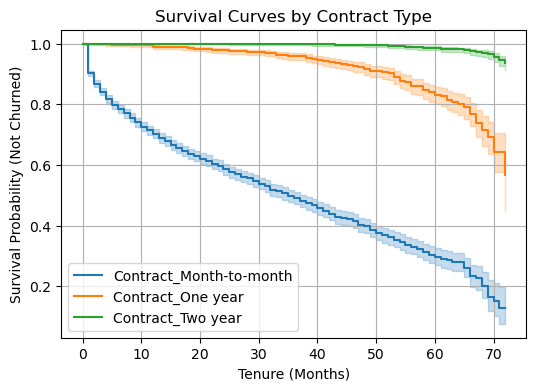

In [48]:
# Survival curves by Contract
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()

plt.figure(figsize=(6, 4))
for label in ['Contract_Month-to-month', 'Contract_One year', 'Contract_Two year']:
    mask = df[label] == 1
    kmf.fit(df[mask]['tenure'], event_observed=df[mask]['Churn'], label=label)
    kmf.plot_survival_function()

plt.title('Survival Curves by Contract Type')
plt.xlabel('Tenure (Months)')
plt.ylabel('Survival Probability (Not Churned)')
plt.grid(True)
plt.show()

In [49]:
# Conclusion: Month-to-month customers leave the most, two-year customers leave the least. The longer the contract, the lower the churn.

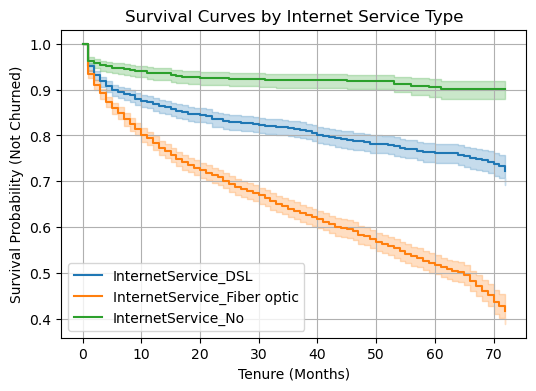

In [50]:
# Survival curves by Internet Service type
plt.figure(figsize=(6, 4))
for label in ['InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No']:
    mask = df[label] == 1
    kmf.fit(df[mask]['tenure'], event_observed=df[mask]['Churn'], label=label)
    kmf.plot_survival_function()

plt.title('Survival Curves by Internet Service Type')
plt.xlabel('Tenure (Months)')
plt.ylabel('Survival Probability (Not Churned)')
plt.grid(True)
plt.show()

In [51]:
# Conclusion: Fiber optic customers leave the most, DSL customers are in the middle, and customers without internet leave the least.

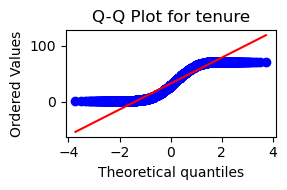

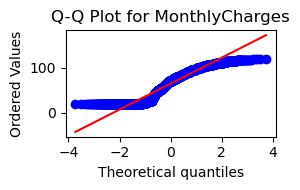

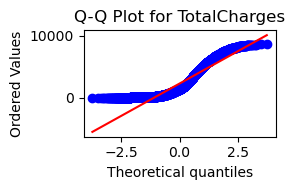

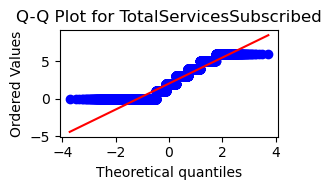

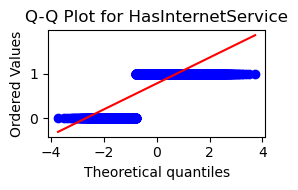

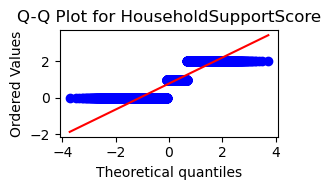

In [52]:
# Normality check with QQ plot
# p > 0.05, Fail to reject H0(normally distributed), likely normal dist.
import matplotlib.pyplot as plt
import scipy.stats as stats

columns = ['tenure', 'MonthlyCharges', 'TotalCharges', 'TotalServicesSubscribed', 'HasInternetService', 'HouseholdSupportScore']
for col in columns:
    plt.figure(figsize=(3, 2))
    stats.probplot(df[col], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot for {col}')
    plt.tight_layout()
    plt.show()

In [53]:
# Non-linear relationship within QQ plots imply a Non-Gaussian distribution.

In [54]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'TotalServicesSubscribed', 'HasInternetService',
       'HouseholdSupportScore', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [55]:
df.iloc[10]

gender                                       0.00
SeniorCitizen                                0.00
Partner                                      1.00
Dependents                                   1.00
tenure                                      13.00
PhoneService                                 1.00
MultipleLines                                0.00
OnlineSecurity                               1.00
OnlineBackup                                 0.00
DeviceProtection                             0.00
TechSupport                                  0.00
StreamingTV                                  0.00
StreamingMovies                              0.00
PaperlessBilling                             1.00
MonthlyCharges                              49.95
TotalCharges                               587.45
Churn                                        0.00
TotalServicesSubscribed                      1.00
HasInternetService                           1.00
HouseholdSupportScore                        2.00


In [56]:
# Require for later step
df_raw = df.copy()
df_raw

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
7039,1,0,1,1,72,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
7040,1,0,1,1,11,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
7041,0,1,1,0,4,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [57]:
# Standardization 
from sklearn.preprocessing import StandardScaler

numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges', 'TotalServicesSubscribed']
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [58]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,-1.280248,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0.064303,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,-1.239504,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0.512486,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,-1.239504,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [59]:
df_raw.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [60]:
df.iloc[10]

gender                                     0.000000
SeniorCitizen                              0.000000
Partner                                    1.000000
Dependents                                 1.000000
tenure                                    -0.791321
PhoneService                               1.000000
MultipleLines                              0.000000
OnlineSecurity                             1.000000
OnlineBackup                               0.000000
DeviceProtection                           0.000000
TechSupport                                0.000000
StreamingTV                                0.000000
StreamingMovies                            0.000000
PaperlessBilling                           1.000000
MonthlyCharges                            -0.493561
TotalCharges                              -0.748188
Churn                                      0.000000
TotalServicesSubscribed                   -0.562044
HasInternetService                         1.000000
HouseholdSup

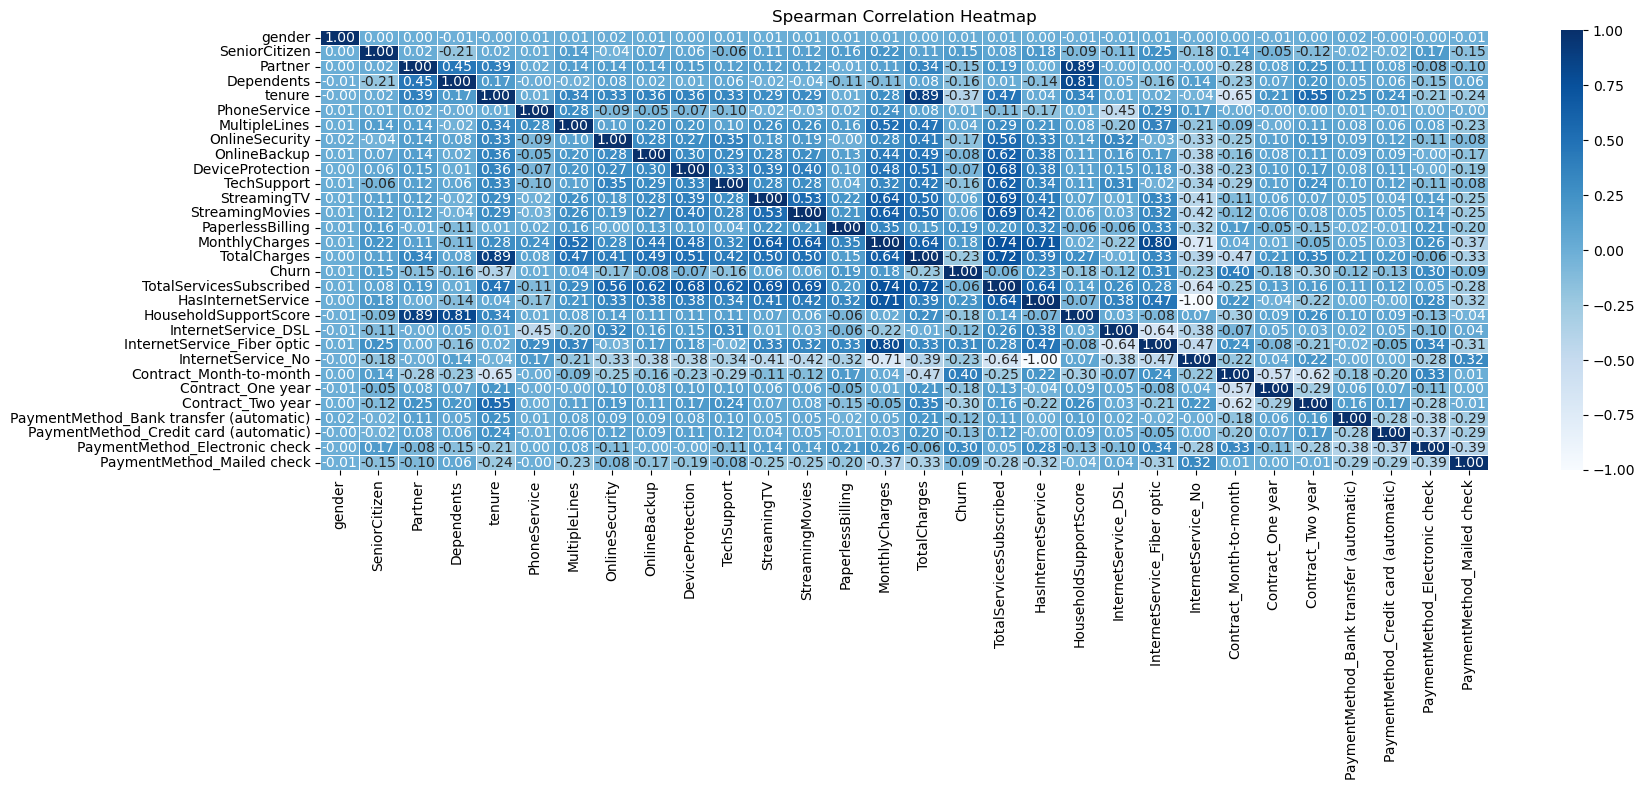

In [61]:
# Spearman Correlation - Heatmap
corr = df.corr(method='spearman')
plt.figure(figsize=(18, 8))
sns.heatmap(corr, annot=True, cmap='Blues', linewidths=0.5, fmt=".2f")
plt.title('Spearman Correlation Heatmap')
plt.tight_layout()
plt.show()

In [62]:
# Multicollinearity check: VIF range 5-10
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = df.drop(columns=['Churn'], errors='ignore')  # 'Churn' is the target
X_const = add_constant(X)

vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X_const.values, i + 1) for i in range(len(X.columns))]

vif_data = vif_data.sort_values(by='VIF', ascending=False)
print(vif_data)

                                    Feature         VIF
28               PaymentMethod_Mailed check         inf
11                              StreamingTV         inf
19                      InternetService_DSL         inf
18                    HouseholdSupportScore         inf
17                       HasInternetService         inf
16                  TotalServicesSubscribed         inf
22                  Contract_Month-to-month         inf
23                        Contract_One year         inf
24                        Contract_Two year         inf
12                          StreamingMovies         inf
10                              TechSupport         inf
21                       InternetService_No         inf
9                          DeviceProtection         inf
8                              OnlineBackup         inf
7                            OnlineSecurity         inf
25  PaymentMethod_Bank transfer (automatic)         inf
26    PaymentMethod_Credit card (automatic)     

In [63]:
# Comment: Heatmap used to validate key churn drivers and support feature engineering decisions rather than for aggressive feature elimination.

In [64]:
# Chi-Square test: p<0.05 then accepted, else rejected
from scipy.stats import chi2_contingency

# Excluding target 'Churn'
cat_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
    'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
    'InternetService_DSL', 'InternetService_Fiber optic',
    'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
    'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
    'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check',
    'PaymentMethod_Mailed check']
print("Chi-Square Test Results:")

for col in cat_columns:
    contingency = pd.crosstab(df[col], df['Churn'])
    chi2, p, dof, expected = chi2_contingency(contingency)
    print(f"{col}: chi2 = {chi2:.2f}, p-value = {p:.6f} {'**Significant**' if p < 0.05 else '**NOT Significant**'}")

Chi-Square Test Results:
gender: chi2 = 0.48, p-value = 0.490488 **NOT Significant**
SeniorCitizen: chi2 = 158.44, p-value = 0.000000 **Significant**
Partner: chi2 = 157.50, p-value = 0.000000 **Significant**
Dependents: chi2 = 186.32, p-value = 0.000000 **Significant**
PhoneService: chi2 = 0.87, p-value = 0.349924 **NOT Significant**
MultipleLines: chi2 = 11.09, p-value = 0.000869 **Significant**
OnlineSecurity: chi2 = 205.42, p-value = 0.000000 **Significant**
OnlineBackup: chi2 = 47.25, p-value = 0.000000 **Significant**
DeviceProtection: chi2 = 30.50, p-value = 0.000000 **Significant**
TechSupport: chi2 = 189.97, p-value = 0.000000 **Significant**
StreamingTV: chi2 = 27.84, p-value = 0.000000 **Significant**
StreamingMovies: chi2 = 25.76, p-value = 0.000000 **Significant**
PaperlessBilling: chi2 = 256.87, p-value = 0.000000 **Significant**
InternetService_DSL: chi2 = 107.78, p-value = 0.000000 **Significant**
InternetService_Fiber optic: chi2 = 663.36, p-value = 0.000000 **Signific

In [65]:
# As per ChiSquare test, only Gender & PhoneService are **NOT Significant**

In [66]:
# Train baseline models with RF, XGBoost & ANN using all variables 
# Don't resolving imbalanced target variable (Churn) as its a baseline model
X = df.drop('Churn', axis='columns')
y = df['Churn']
print(X.shape)
print(y.shape)
print("*Imbalance target variables fit in next stage.")
print(y.value_counts())

(7032, 29)
(7032,)
*Imbalance target variables fit in next stage.
Churn
0    5163
1    1869
Name: count, dtype: int64


In [67]:
# Hold-Out Validation: train-test split (80:20)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42, 
                                                    stratify=y)

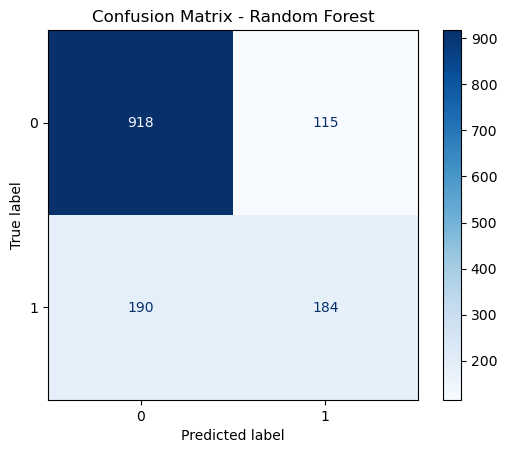


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.49      0.55       374

    accuracy                           0.78      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.77      0.78      0.77      1407

ROC-AUC Score: 0.8180


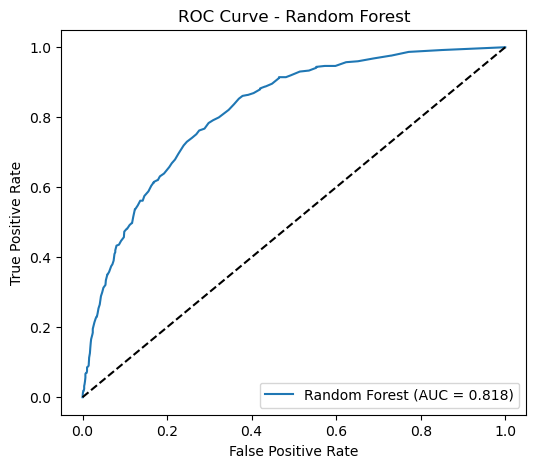

In [68]:
# Model: RandomForest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_auc_score, roc_curve)
import matplotlib.pyplot as plt

# Fitting RF model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
# Predictions
y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)[:, 1]  # probabilities for Churn = 1

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.show()
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC Score: {roc_auc:.4f}")
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"Random Forest (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], 'k--')  # diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend(loc="lower right")
plt.show()

In [69]:
# Train accuracy >> Test accuracy, it’s likely overfitting
rf_model.fit(X_train, y_train)
train_score = rf_model.score(X_train, y_train)
test_score = rf_model.score(X_test, y_test)

print("Train accuracy:", train_score)
print("Test accuracy :", test_score)

Train accuracy: 0.9987555555555555
Test accuracy : 0.783226723525231


In [70]:
# List of depths of all trees in the forest
tree_depths = [estimator.tree_.max_depth for estimator in rf_model.estimators_]

# Max depth among all trees
max_tree_depth = max(tree_depths)
print(f"Maximum depth among all trees: {max_tree_depth}")

Maximum depth among all trees: 31


In [71]:
# Feature Importance from R_Forest
importance = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print(importance.sort_values(ascending=False))

TotalCharges                               0.173037
MonthlyCharges                             0.153358
tenure                                     0.145573
Contract_Month-to-month                    0.072409
TotalServicesSubscribed                    0.038244
InternetService_Fiber optic                0.038236
PaymentMethod_Electronic check             0.029895
gender                                     0.026941
PaperlessBilling                           0.025416
HouseholdSupportScore                      0.023654
Contract_Two year                          0.022063
OnlineSecurity                             0.021175
SeniorCitizen                              0.020641
MultipleLines                              0.019099
OnlineBackup                               0.018511
TechSupport                                0.018002
DeviceProtection                           0.015822
Partner                                    0.015088
StreamingMovies                            0.015011
StreamingTV 

In [72]:
importance_df = pd.DataFrame({
    'Features': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

In [73]:
importance_df.head(12)

,Features,Importance
15,TotalCharges,0.173037
14,MonthlyCharges,0.153358
4,tenure,0.145573
22,Contract_Month-to-month,0.072409
16,TotalServicesSubscribed,0.038244
20,InternetService_Fiber optic,0.038236
27,PaymentMethod_Electronic check,0.029895
0,gender,0.026941
13,PaperlessBilling,0.025416
18,HouseholdSupportScore,0.023654


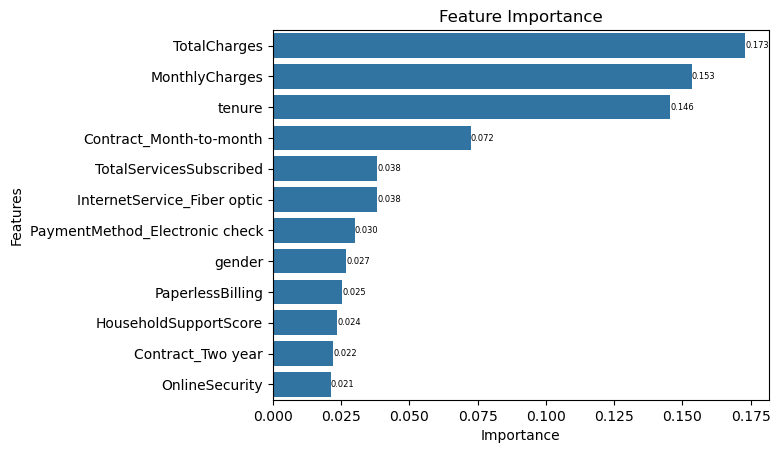

In [74]:
# plot feature importance 
plt.title("Feature Importance")
ax = sns.barplot(data=importance_df.head(12), x = 'Importance', y = 'Features')
ax.bar_label(ax.containers[0], fmt='%.3f', fontsize=6);

In [75]:
# Comment: Evaluate baseline RF-model using recall and ROC–AUC, computing AUC from predicted probabilities rather than class labels
#          AUC ~0.82 means the model can generally rank churners higher than non-churners
#          Top 4 most significat variables: TotalCharges, MonthlyCharges, tenure, Contract_Month-to-month

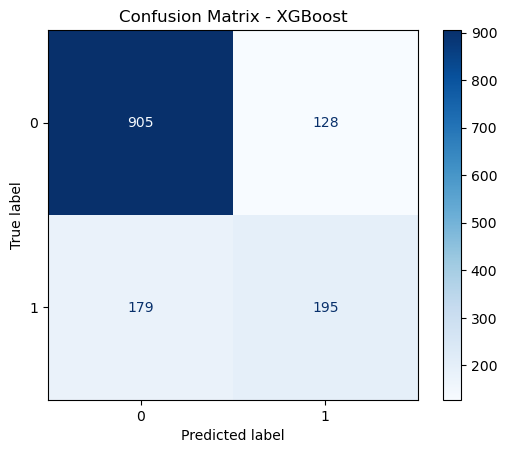


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1033
           1       0.60      0.52      0.56       374

    accuracy                           0.78      1407
   macro avg       0.72      0.70      0.71      1407
weighted avg       0.77      0.78      0.78      1407

ROC-AUC Score: 0.8305


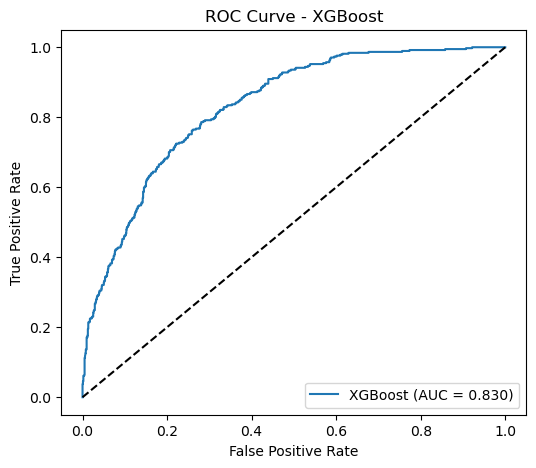

In [76]:
# Model: XGBoost
from xgboost import XGBClassifier
from sklearn.metrics import (confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_auc_score, roc_curve)
import matplotlib.pyplot as plt

# Fitting XGB model 
xgb_model = XGBClassifier(
    random_state=42,
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.9,
    colsample_bytree=0.9,
    eval_metric="logloss")
xgb_model.fit(X_train, y_train)
# Predictions
y_pred = xgb_model.predict(X_test)
y_prob = xgb_model.predict_proba(X_test)[:, 1]  # prob. for Churn = 1

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - XGBoost")
plt.show()
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC Score: {roc_auc:.4f}")
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"XGBoost (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], 'k--')  # diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - XGBoost")
plt.legend(loc="lower right")
plt.show()

In [77]:
# Train accuracy >> Test accuracy, it’s likely overfitting
xgb_model.fit(X_train, y_train)
train_score = xgb_model.score(X_train, y_train)
test_score = xgb_model.score(X_test, y_test)

print("Train accuracy:", train_score)
print("Test accuracy :", test_score)

Train accuracy: 0.8485333333333334
Test accuracy : 0.7818052594171997


In [78]:
# Comment: XGBoost outperformed RF on baseline churn prediction with higher ROC–AUC (0.8305) & improved churn recall (0.52), indicating better discrimination of churners

In [79]:
!pip install tensorflow --quiet

C:\Users\Atul Gupta\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - auc: 0.7035 - loss: 0.5401 - val_auc: 0.8442 - val_loss: 0.4163
Epoch 2/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - auc: 0.8308 - loss: 0.4385 - val_auc: 0.8489 - val_loss: 0.4089
Epoch 3/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - auc: 0.8329 - loss: 0.4374 - val_auc: 0.8478 - val_loss: 0.4103
Epoch 4/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - auc: 0.8406 - loss: 0.4277 - val_auc: 0.8492 - val_loss: 0.4092
Epoch 5/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - auc: 0.8405 - loss: 0.4266 - val_auc: 0.8497 - val_loss: 0.4082
Epoch 6/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - auc: 0.8432 - loss: 0.4243 - val_auc: 0.8507 - val_loss: 0.4075
Epoch 7/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - auc: 0.8470 - loss: 0.4169 - val_auc: 0.8509 - val_loss: 0.4070
Epoch 8/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - auc: 0.8523 - loss: 0.4126 - val_auc: 0.8498 - val_loss: 0.4087
Epoch 9/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/

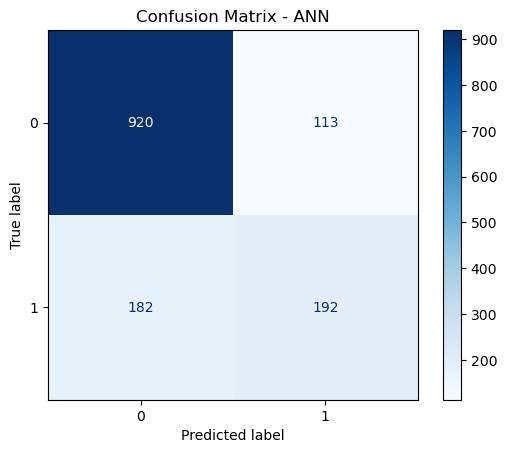


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.63      0.51      0.57       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407

ROC-AUC Score: 0.8335


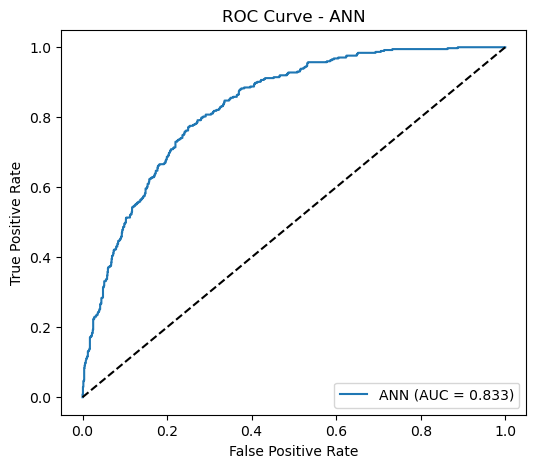

In [80]:
# Model: ANN (Keras)
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_auc_score, roc_curve)

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# 1) Scale ONLY continuous numeric columns (for ANN)
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges', 'TotalServicesSubscribed'] 
scaler = StandardScaler()
X_train_ann = X_train.copy()
X_test_ann  = X_test.copy()

X_train_ann[numeric_cols] = scaler.fit_transform(X_train_ann[numeric_cols])
X_test_ann[numeric_cols]  = scaler.transform(X_test_ann[numeric_cols])

# Convert to numpy arrays for Keras
X_train_np = X_train_ann.values
X_test_np  = X_test_ann.values

y_train_np = y_train.values if hasattr(y_train, "values") else np.array(y_train)
y_test_np  = y_test.values if hasattr(y_test, "values") else np.array(y_test)

# 2) Build a baseline ANN
tf.random.set_seed(42)

ann_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_np.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

ann_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[tf.keras.metrics.AUC(name='auc')]
)

early_stop = EarlyStopping(
    monitor='val_auc',
    mode='max',
    patience=10,
    restore_best_weights=True
)

history = ann_model.fit(
    X_train_np, y_train_np,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# 3) Predictions
y_prob = ann_model.predict(X_test_np).ravel()          # probabilities for Churn=1
y_pred = (y_prob >= 0.5).astype(int)                  # baseline threshold

# 4) Confusion Matrix
cm = confusion_matrix(y_test_np, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - ANN")
plt.show()

# 5) Classification Report
print("\nClassification Report:")
print(classification_report(y_test_np, y_pred))

# 6) ROC-AUC Score + ROC Curve
roc_auc = roc_auc_score(y_test_np, y_prob)
print(f"ROC-AUC Score: {roc_auc:.4f}")

fpr, tpr, thresholds = roc_curve(y_test_np, y_prob)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"ANN (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - ANN")
plt.legend(loc="lower right")
plt.show()

In [81]:
# Comment: RF (AUC 0.82, Recall 0.49), XGB (AUC 0.83, Recall 0.52), ANN (AUC 0.84, Recall 0.50)
#          Churn prioritize high recall over precision, XGBoost with highest recall, however ANN ranks customers the best.
# 
# Recall: Proportion of all actual positives that were classified correctly as positives.
# Precision: Accuracy of positive predictions.

In [82]:
# Winning Model: XGBoost 
# RF has weaker recall
# ANN has best AUC & but recall still moderate
# XGBoost has best churn recall (0.52) & strong AUC (0.83), 

In [83]:
# Threshold tuning with values nearby 0.5 (missing churner is costly & default 0.5 probability is too strict)
# pick a new threshold/probability based on highest F1-score

In [84]:
y_prob = xgb_model.predict_proba(X_test)[:, 1]
#list(y_prob)
y_prob.shape

(1407,)

In [85]:
# Pick threshold where Recall is highest without Precision collapsing
from sklearn.metrics import precision_score, recall_score, f1_score

thresholds = np.arange(0.2, 0.6, 0.05) # range 
results = []
for t in thresholds:
    y_pred_t = (y_prob >= t).astype(int)
    results.append({
        "Threshold": t,
        "Precision": precision_score(y_test, y_pred_t),
        "Recall": recall_score(y_test, y_pred_t),
        "F1_score": f1_score(y_test, y_pred_t)
    })
df_thresholds = pd.DataFrame(results)
print(df_thresholds)

   Threshold  Precision    Recall  F1_score
0       0.20   0.467766  0.834225  0.599424
1       0.25   0.486842  0.791444  0.602851
2       0.30   0.513661  0.754011  0.611051
3       0.35   0.542683  0.713904  0.616628
4       0.40   0.574118  0.652406  0.610763
5       0.45   0.595109  0.585561  0.590296
6       0.50   0.603715  0.521390  0.559541
7       0.55   0.626812  0.462567  0.532308


In [86]:
# Picking new threshold as 0.35, it has the highest F1_score and high Recall value.
best_threshold = 0.35
y_pred_final = (y_prob >= best_threshold).astype(int)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_final))

              precision    recall  f1-score   support

           0       0.88      0.78      0.83      1033
           1       0.54      0.71      0.62       374

    accuracy                           0.76      1407
   macro avg       0.71      0.75      0.72      1407
weighted avg       0.79      0.76      0.77      1407



In [87]:
# SHAP (variable selection for XGBoost)
# Since baseline XGBoost model was trained with imbalanced data, therefore SHAP will also be carried out on imbalanced data.
!pip install shap --quiet

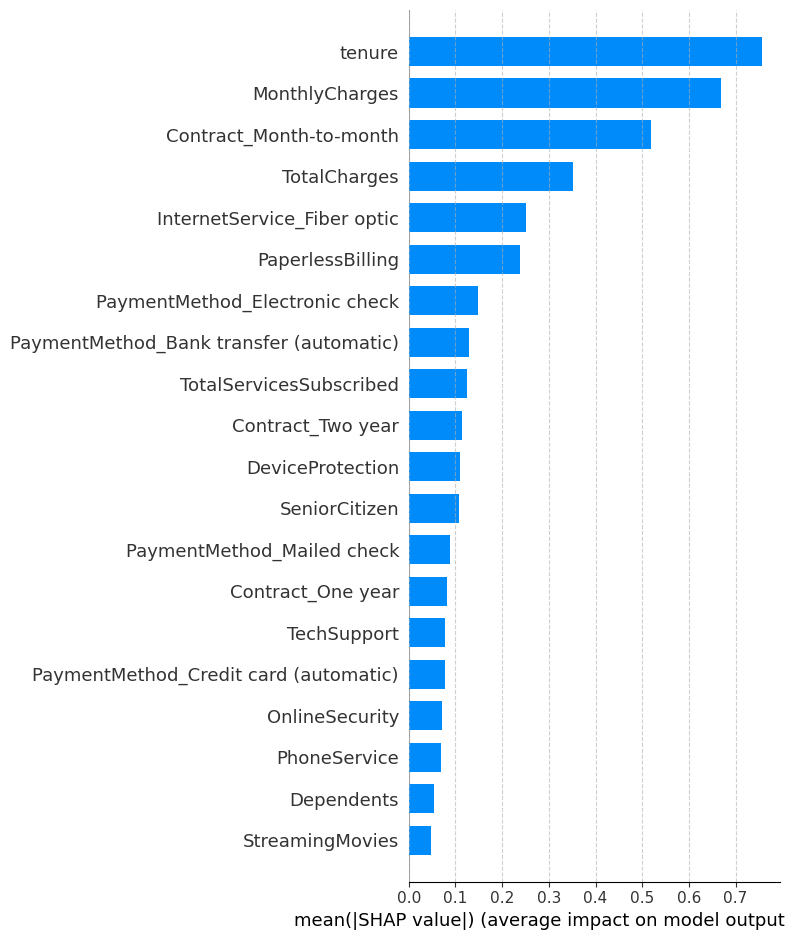

In [88]:
import shap
xgb_model.fit(X_test, y_test)
# SHAP explainer
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X)
# Summary plot (bar)
shap.summary_plot(shap_values, X, plot_type="bar", show=False)
plt.grid(True, axis="x", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

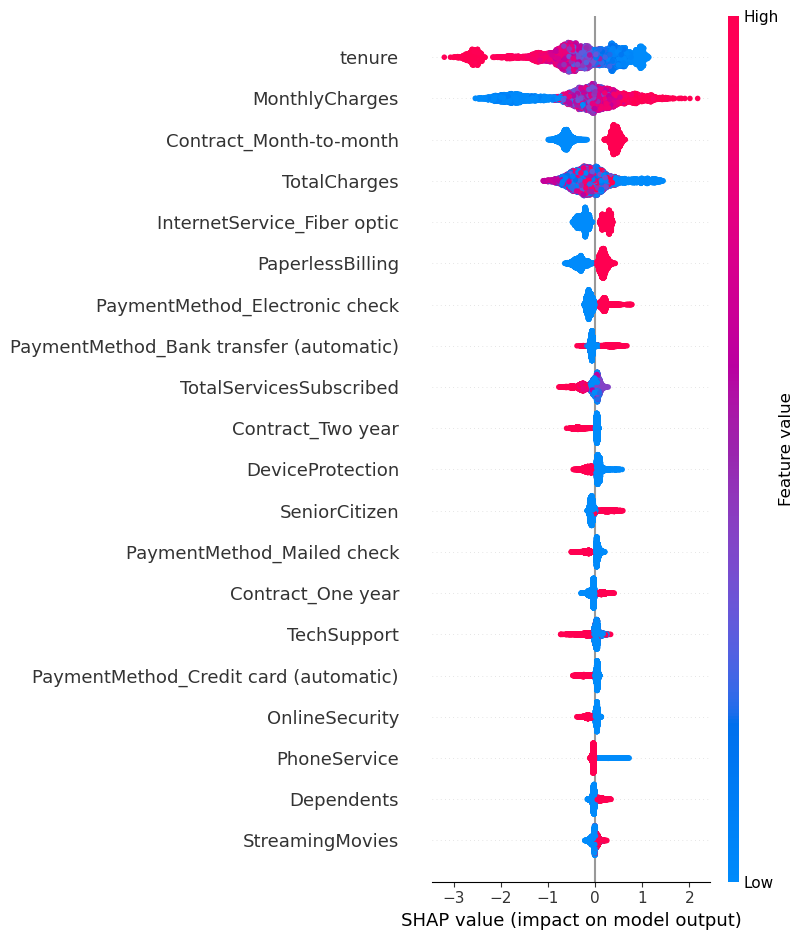

In [89]:
# Summary plot (beeswarm)
shap.summary_plot(shap_values, X)

In [90]:
# Comments: Right increases chances of churn, whereas left decreases. 
# Tenure: Short tenure (blue) pushes customers towards churn; long tenure (red) keeps customers from churning.
# High monthly charges (red) higher churn risk; low charges (blue) lower churn risk.
# Being on month-to-month strongly increases churn, long contracts reduce churn

In [91]:
# Baseline model completed, moving towards final model fitting with XGBoost.

In [92]:
# 12 independent variables & 1 dependent varaibel from dataset based on absolute mean SHAP values > 0.1
new_df = df[['tenure', 'MonthlyCharges', 'Contract_Month-to-month', 'TotalCharges', 'InternetService_Fiber optic',
            'PaperlessBilling', 'PaymentMethod_Electronic check', 'PaymentMethod_Bank transfer (automatic)', 
            'TotalServicesSubscribed', 'Contract_Two year', 'DeviceProtection', 'SeniorCitizen', 'Churn']]
new_df.shape

(7032, 13)

In [93]:
# Imbalance handling with SMOTE
!pip install imbalanced-learn --quiet

In [94]:
X = new_df.drop('Churn', axis='columns')
y = new_df['Churn']
print(X.shape)
print(y.shape)

(7032, 12)
(7032,)


In [95]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)
y_sm.value_counts()

Churn
0    5163
1    5163
Name: count, dtype: int64

In [96]:
# Imbalance handing isn't quite useful in XGBoost model, lets only use threshold tuning.  

In [97]:
# Train-test split with Hold-out Validation (80:20)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42, 
                                                    stratify=y)

In [98]:
# (8260+2066)/2 = 5163
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5625, 12)
(1407, 12)
(5625,)
(1407,)


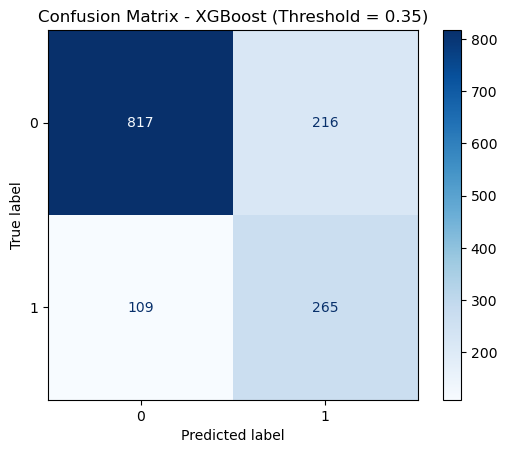


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.79      0.83      1033
           1       0.55      0.71      0.62       374

    accuracy                           0.77      1407
   macro avg       0.72      0.75      0.73      1407
weighted avg       0.79      0.77      0.78      1407

ROC-AUC Score: 0.8310


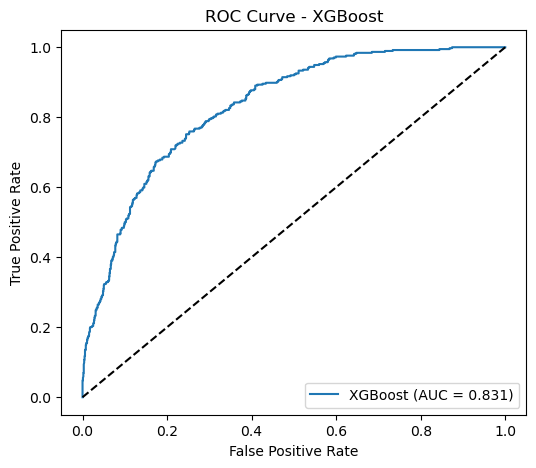

In [99]:
# Model: XGBoost with threshold 0.35 on top 12 variables 
from xgboost import XGBClassifier
from sklearn.metrics import (confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_auc_score, roc_curve)
import matplotlib.pyplot as plt

xgb_model = XGBClassifier(
    random_state=42,
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.9,
    colsample_bytree=0.9,
    eval_metric="logloss")
xgb_model.fit(X_train, y_train)
y_prob = xgb_model.predict_proba(X_test)[:, 1] # [P(class=0), P(class=1)], Churn 1 only

# Threshold tuning 0.35 instead of 0.5 for higher Recall
threshold = 0.35
y_pred = (y_prob >= threshold).astype(int)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_model.classes_)
disp.plot(cmap='Blues')
plt.title(f"Confusion Matrix - XGBoost (Threshold = {threshold})")
plt.show()
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
# ROC-AUC Score (unchanged by threshold)
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"XGBoost (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - XGBoost")
plt.legend(loc="lower right")
plt.show()

In [100]:
# Comment: Correctly identifying 71% of churners, huge improvement from baseline (~52%). High Recall & Precision for Churn 0.

In [101]:
# Hyperparameter Tuning: RandomizedSearchCV | Optune 
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [200, 300, 500],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2]
}

xgb = XGBClassifier(
    random_state=42,
    eval_metric='logloss',
    use_label_encoder=False
)

search = RandomizedSearchCV(
    xgb,
    param_distributions=param_dist,
    n_iter=25,
    scoring='roc_auc',
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

search.fit(X_train, y_train)

best_xgb = search.best_estimator_
print(search.best_params_)

Fitting 3 folds for each of 25 candidates, totalling 75 fits


C:\Users\Atul Gupta\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [05:39:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


{'subsample': 0.7, 'n_estimators': 500, 'min_child_weight': 1, 'max_depth': 3, 'learning_rate': 0.01, 'gamma': 0.1, 'colsample_bytree': 0.7}


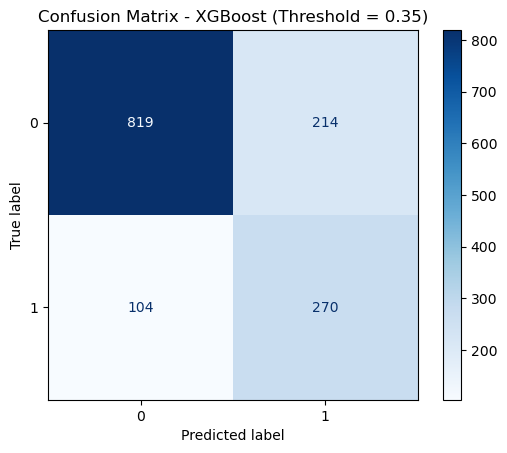


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.79      0.84      1033
           1       0.56      0.72      0.63       374

    accuracy                           0.77      1407
   macro avg       0.72      0.76      0.73      1407
weighted avg       0.80      0.77      0.78      1407

ROC-AUC Score: 0.8394


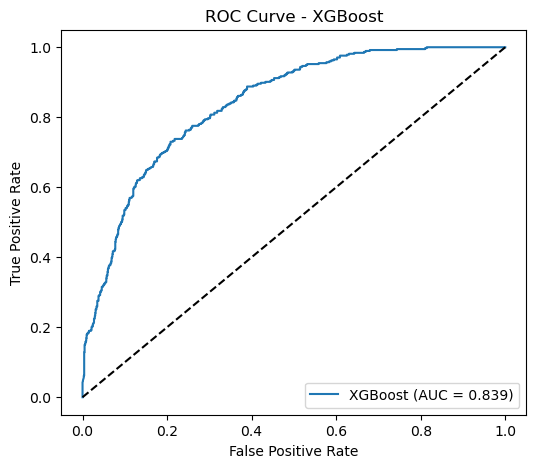

In [102]:
# Model: XGBoost (Hyperparameter Tuning: RandomizedSearchCV)
from xgboost import XGBClassifier
from sklearn.metrics import (confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_auc_score, roc_curve)
import matplotlib.pyplot as plt

xgb_model = XGBClassifier(
    random_state=42,
    eval_metric="logloss",
    subsample=0.7,
    n_estimators=500,
    min_child_weight=1,
    max_depth=3,
    learning_rate=0.01,
    gamma=0.1,
    colsample_bytree=0.7)
xgb_model.fit(X_train, y_train)
y_prob = xgb_model.predict_proba(X_test)[:, 1] # [P(class=0), P(class=1)], Churn 1 only

# Threshold tuning 0.35 instead of 0.5 for higher Recall
threshold = 0.35
y_pred = (y_prob >= threshold).astype(int)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_model.classes_)
disp.plot(cmap='Blues')
plt.title(f"Confusion Matrix - XGBoost (Threshold = {threshold})")
plt.show()
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
# ROC-AUC Score (unchanged by threshold)
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"XGBoost (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - XGBoost")
plt.legend(loc="lower right")
plt.show()

In [103]:
# Comments: Recall and ROC–AUC improved slightly with Hyperparameter Tuning

In [104]:
new_df.iloc[0]

tenure                                    -1.280248
MonthlyCharges                            -1.161694
Contract_Month-to-month                    1.000000
TotalCharges                              -0.994194
InternetService_Fiber optic                0.000000
PaperlessBilling                           1.000000
PaymentMethod_Electronic check             1.000000
PaymentMethod_Bank transfer (automatic)    0.000000
TotalServicesSubscribed                   -0.562044
Contract_Two year                          0.000000
DeviceProtection                           0.000000
SeniorCitizen                              0.000000
Churn                                      0.000000
Name: 0, dtype: float64

In [105]:
X_single = new_df.drop("Churn", axis=1).iloc[[0]]

churn_prob = xgb_model.predict_proba(X_single)[:, 1][0]
threshold = 0.35
churn_pred = int(churn_prob >= threshold)

print(f"Churn probability: {churn_prob:.2f}")
print("Prediction:", "CHURN" if churn_pred else "NO CHURN")

Churn probability: 0.64
Prediction: CHURN


In [106]:
# Pickling for Deployment (Heroku & Docker)

In [107]:
import pickle 

In [108]:
pickle.dump(xgb_model,open('xgb_model.pkl', 'wb'))

In [109]:
pickle_model = pickle.load(open('xgb_model.pkl', 'rb'))

In [110]:
pickle_model.predict(new_df.drop("Churn", axis=1).iloc[[0]])

array([1])

In [111]:
# array([1]) is CHURN

In [112]:
new_df.drop("Churn", axis=1).iloc[[0]].head()

,tenure,MonthlyCharges,Contract_Month-to-month,TotalCharges,InternetService_Fiber optic,PaperlessBilling,PaymentMethod_Electronic check,PaymentMethod_Bank transfer (automatic),TotalServicesSubscribed,Contract_Two year,DeviceProtection,SeniorCitizen
0,-1.280248,-1.161694,1,-0.994194,0,1,1,0,-0.562044,0,0,0


In [113]:
# Deployment json requires non-standardized format, so use df_raw instead

In [114]:
# Rebuild new_df using RAW values (before StandardScaler)
new_df_raw = df_raw[
    ['tenure','MonthlyCharges','Contract_Month-to-month','TotalCharges',
     'InternetService_Fiber optic','PaperlessBilling',
     'PaymentMethod_Electronic check',
     'PaymentMethod_Bank transfer (automatic)',
     'TotalServicesSubscribed','Contract_Two year',
     'DeviceProtection','SeniorCitizen','Churn']
]

X = new_df_raw.drop("Churn", axis=1)
y = new_df_raw["Churn"]

# retrain XGB
xgb_model.fit(X, y)

# save
pickle.dump(xgb_model, open("xgb_model.pkl", "wb"))

In [115]:
# Pickle file having issues due to XGBoost version 
xgb_model.save_model("xgb_model.json")